### Classification task.


* Early stopping: keras can automatically stop training based on a loss condition on the validation data passed during the model.fit() call. 

* Dropout added to to turn off neurons to prevent overfitting.
* Each dropout layer will "drop" a user defined percentage of neuron units in the previous layer every batch.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = r"Keras2\cancer_classification.csv"

df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [3]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [4]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'benign_0__mal_1'],
      dtype='object')

In [3]:
df.head()
# last column is target.

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

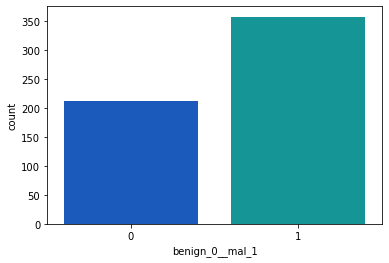

In [8]:
# Check the count plot for the classification problem. to the balance of the data.

sns.countplot(x='benign_0__mal_1',data=df,palette='winter')

In [9]:
df.corr()['benign_0__mal_1']

mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

<AxesSubplot:>

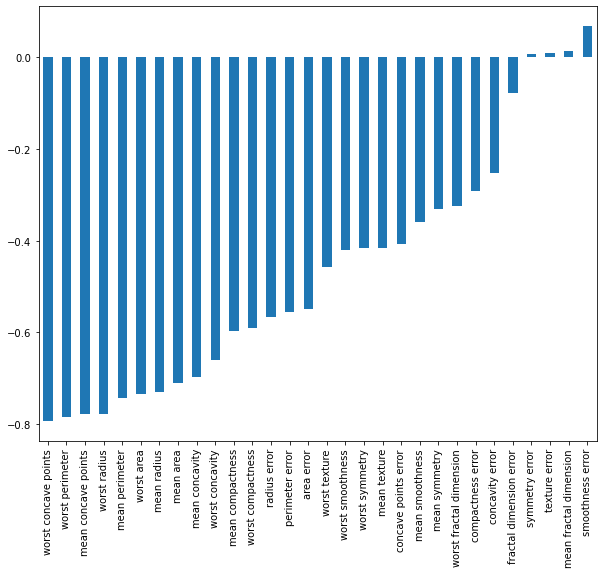

In [13]:
plt.figure(figsize=(10,8))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')


<AxesSubplot:>

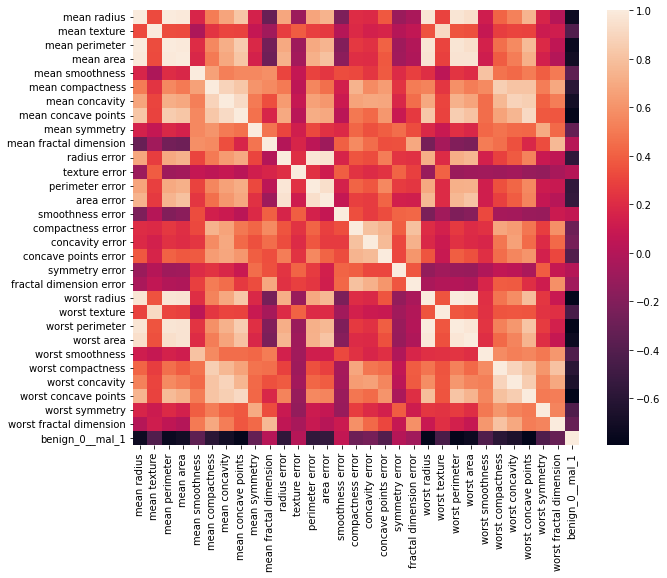

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

#### Train Test Split and data pre prossesing.

In [3]:
X = df.drop('benign_0__mal_1',axis=1).values
y= df['benign_0__mal_1'].values

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

# when data is too big or too small go for small split. 


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [6]:
X_train = scaler.fit_transform(X_train)

In [7]:
X_test = scaler.transform(X_test)

### Dealing with overfitting and evaluation

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [10]:
X_train.shape

(426, 30)

In [11]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu')) 
# cut layer is half.(widthwise)
# binary classification so last activation function will be sigmoid. 
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [12]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=600) # select way to many epochs.

Epoch 1/600
14/14 [==============================] - 1s 29ms/step - loss: 0.6808 - val_loss: 0.6590
Epoch 2/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6553 - val_loss: 0.6364
Epoch 3/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6282 - val_loss: 0.6055
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5931 - val_loss: 0.5657
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5526 - val_loss: 0.5208
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5086 - val_loss: 0.4744
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4621 - val_loss: 0.4266
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4157 - val_loss: 0.3793
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3724 - val_loss: 0.3372
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3333 - val_loss: 0.3009
Epoch 11

<AxesSubplot:>

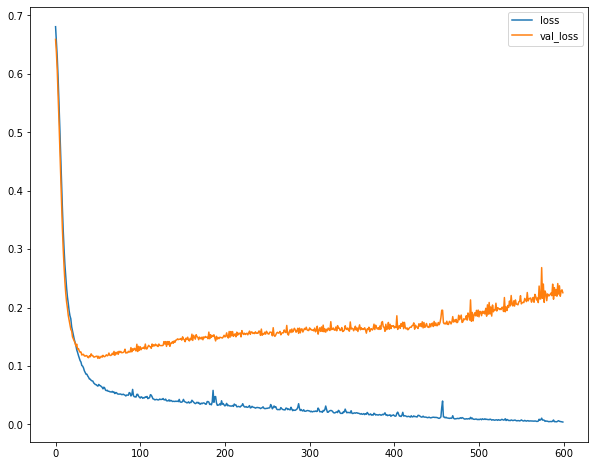

In [13]:
losses = pd.DataFrame(model.history.history)
losses.plot(figsize=(10,8)) # overfitting

# use tensorflow keras callbacks to stop training before overfitting.

In [14]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu')) # cut layer is half.
# binary classification so last activation function will be sigmoid. 
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [15]:
from tensorflow.keras.callbacks import EarlyStopping
# help(EarlyStopping)
# patience
# read doc string.

In [16]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

# creating early stop instance.
# mode is based on what we want to archive with the model. (loss -> min , accuracy -> maximum) 

In [17]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=600,callbacks=[early_stop])

# pass as list 🤷‍♂️

Epoch 1/600
14/14 [==============================] - 1s 12ms/step - loss: 0.6738 - val_loss: 0.6510
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6342 - val_loss: 0.6158
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5936 - val_loss: 0.5693
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5459 - val_loss: 0.5192
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4947 - val_loss: 0.4629
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4421 - val_loss: 0.4078
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3925 - val_loss: 0.3583
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3490 - val_loss: 0.3181
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3140 - val_loss: 0.2817
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.2840 - val_loss: 0.2574
Epoch 11

In [19]:
model.save('m2.h5')

<AxesSubplot:>

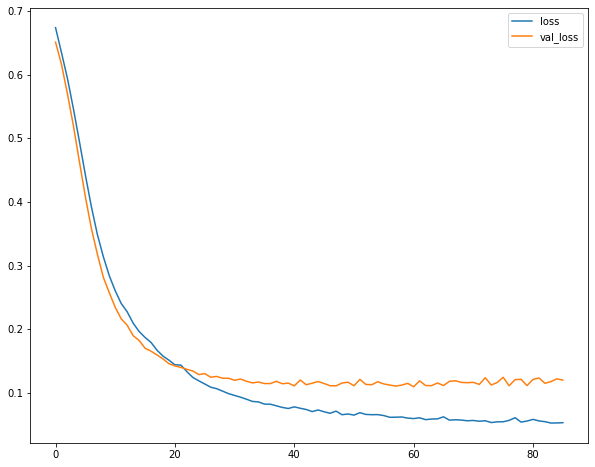

In [18]:
losses = pd.DataFrame(model.history.history)
losses.plot(figsize=(10,8)) 

In [19]:
# Dropout layer = drop random nurons from the model.
from tensorflow.keras.layers import Dropout

In [20]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
# add in  dropout 

# 0.2 to 0.5 is normal value of ( percentage of nurons turn off randomly(50%))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [21]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=600,callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 13ms/step - loss: 0.7307 - val_loss: 0.7028
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.7174 - val_loss: 0.6868
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6969 - val_loss: 0.6785
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6784 - val_loss: 0.6734
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6810 - val_loss: 0.6651
Epoch 6/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6706 - val_loss: 0.6505
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6450 - val_loss: 0.6236
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6050 - val_loss: 0.5833
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6044 - val_loss: 0.5494
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5820 - val_loss: 0.5232
Epoch 11

<AxesSubplot:>

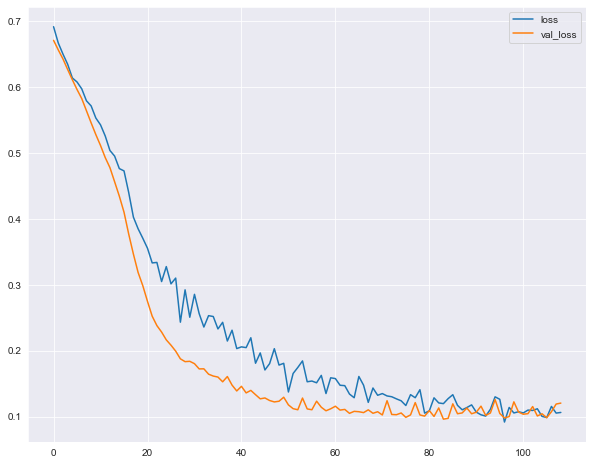

In [28]:
# earlier
sns.set_style('darkgrid')
losses = pd.DataFrame(model.history.history)
losses.plot(figsize=(10,8)) 

<AxesSubplot:>

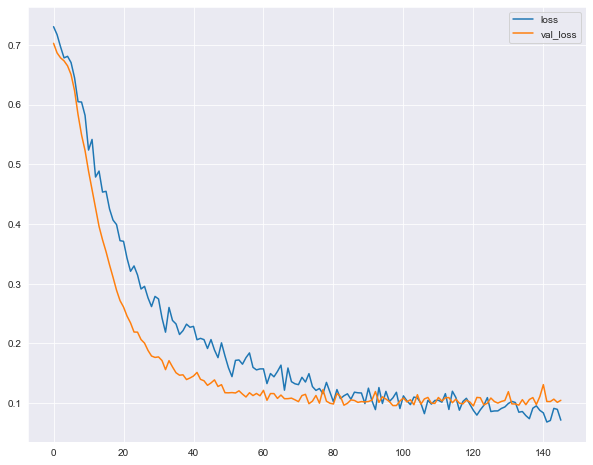

In [22]:
sns.set_style('darkgrid')
losses = pd.DataFrame(model.history.history)
losses.plot(figsize=(10,8)) 

In [29]:
model.save('m3.h5')
# works best show above result. 

In [36]:
# classification task.
 
# predictions = model.predict(X_test)
# predictions = np.argmax(predictions,axis=1)

# SO code
# y_predict = np.argmax(model.predict(X_test), axis=-1)

In [23]:
model.predict(X_test)

array([[9.90614593e-01],
       [9.94029641e-01],
       [9.96547461e-01],
       [2.92178988e-03],
       [9.99235451e-01],
       [9.99362588e-01],
       [9.99720454e-01],
       [3.21042890e-08],
       [9.97968733e-01],
       [9.98795092e-01],
       [2.58445740e-04],
       [9.98011768e-01],
       [9.71816957e-01],
       [9.99236465e-01],
       [1.63137913e-04],
       [9.99537230e-01],
       [9.95905936e-01],
       [9.99551892e-01],
       [1.74423434e-07],
       [3.94504070e-02],
       [9.86586690e-01],
       [9.97569680e-01],
       [9.92842317e-01],
       [9.99387026e-01],
       [3.41832638e-04],
       [9.55637217e-01],
       [1.45682334e-05],
       [9.99935746e-01],
       [4.65537014e-05],
       [5.38289547e-04],
       [1.86218351e-01],
       [6.09070063e-04],
       [7.82688498e-01],
       [1.86070263e-01],
       [9.99518871e-01],
       [9.99851048e-01],
       [1.03413463e-02],
       [1.77295506e-02],
       [3.42951353e-05],
       [7.83637688e-08],


In [15]:
from tensorflow.keras.models import load_model

model_new = load_model('m3.h5')

slope :  -0.6504576659038901
Intercept :  16.50943935926773


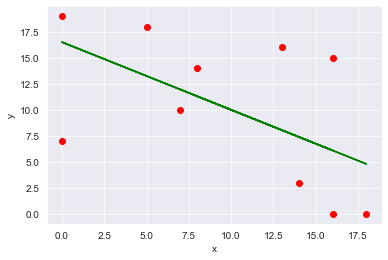

In [35]:
# # jn code
# import numpy as np
# import matplotlib.pyplot as plt
# x = np.random.randint(20, size=10)
# y = np.random.randint(20, size=10)

# mean_x = np.mean(x)
# mean_y = np.mean(y)
# m = (np.sum(x*y)-10*mean_x*mean_y)/(np.sum(x*x)-10*mean_x*mean_y)
# c = mean_y-m*mean_x
# line = m*x+c
# print("slope : ", m)
# print("Intercept : ", c)
# plt.plot(x, line, '-g')  # solid green
# plt.scatter(x, y, color='red')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()


In [24]:
model.predict_classes(X_test)
# check some alternative from stackoverflow.

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [25]:
# Option 1: 
# predict_x=model.predict(X_test) 
# classes_x=np.argmax(predict_x,axis=1)

# Option 2:(my choice)
# predictions = (model.predict(X_test) > 0.5).astype("int32")

# Option 3:
# y_pred = model.predict(X_test)
# y_pred = np.round(y_pred).astype(int)

# Option 4:
# predicted = np.argmax(model.predict(token_list),axis=1)

# Option 5:
# y_predict = np.argmax(model.predict(test_sequences), axis=1) 


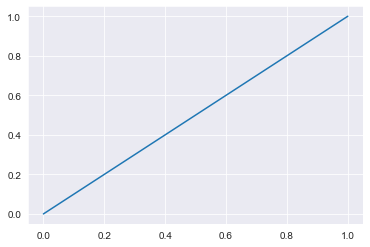

In [41]:
(model.predict(X_test) > 0.5).astype(int)
plt.plot((model.predict(X_test) > 0.5).astype(int),
         (model.predict(X_test) > 0.5).astype("int32"))

# both are same. 


In [29]:
predictions = (model.predict(X_test) > 0.5).astype("int32")
predictions


array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

## Model Evaluation. 

In [31]:
from sklearn.metrics import confusion_matrix,classification_report

In [32]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [33]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 3 85]]
